Evaluating Random Forest...
Accuracy: 0.9975, Precision: 0.9977, Recall: 0.9975, F1 Score: 0.9975
Evaluating KNN...
Accuracy: 0.9140, Precision: 0.9166, Recall: 0.9140, F1 Score: 0.9134
Evaluating SVM...
Accuracy: 0.9140, Precision: 0.9166, Recall: 0.9140, F1 Score: 0.9097
Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9656, Precision: 0.9657, Recall: 0.9656, F1 Score: 0.9655

Model Comparison:
                      accuracy  precision    recall        f1
Random Forest        0.997543   0.997660  0.997543  0.997543
KNN                  0.914005   0.916643  0.914005  0.913366
SVM                  0.914005   0.916643  0.914005  0.909721
Logistic Regression  0.965602   0.965701  0.965602  0.965488


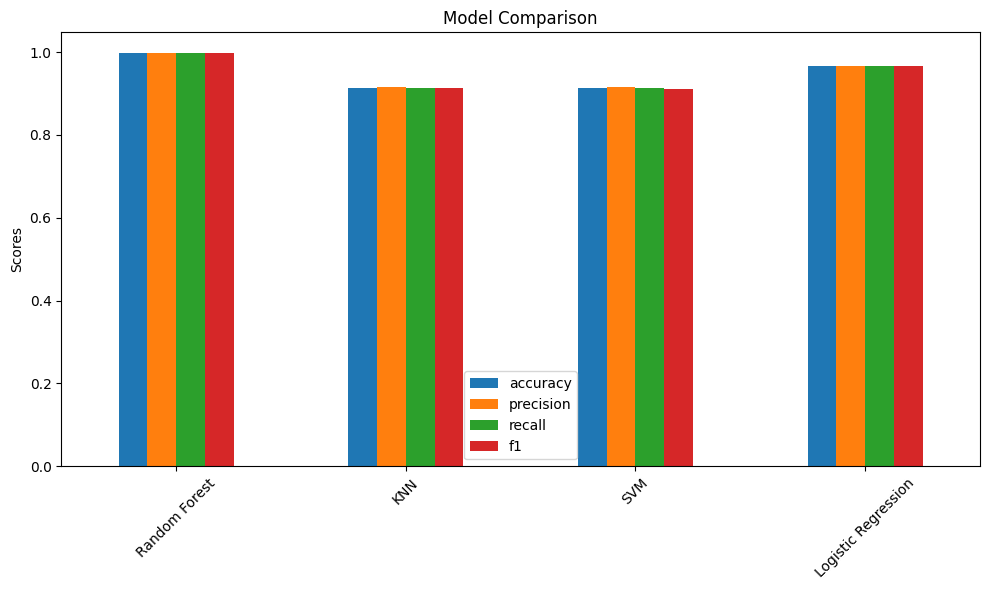

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/SSL.csv')  # Replace with actual path

# Preprocessing
X = data.drop(columns='LABEL')  # Assuming 'LABEL' is your label column
y = data['LABEL']

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Evaluate models
results = {}
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculate metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

    # Print results
    print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Print model comparison
print("\nModel Comparison:\n", results_df)

# Plot results
plt.figure(figsize=(10, 6))
results_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', ax=plt.gca())
plt.title('Model Comparison')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Best Model: Random Forest
Accuracy: 0.9975
Precision: 0.9977
Recall: 0.9975
F1 Score: 0.9975


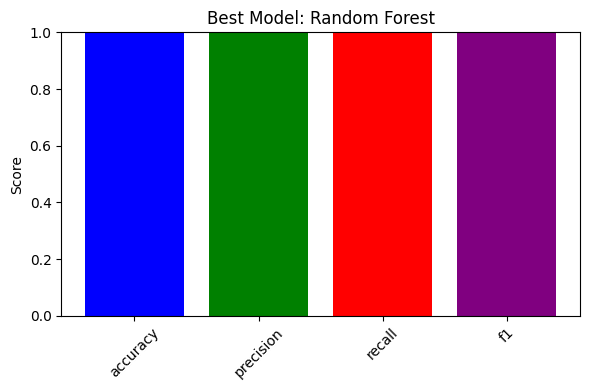

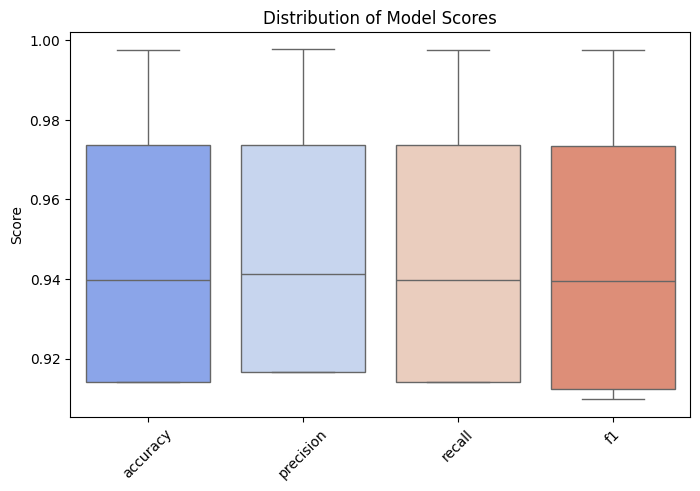

In [2]:
import seaborn as sns


# Select the best model based on highest F1-score
best_model_name = results_df['f1'].idxmax()
best_model_metrics = results[best_model_name]

# Print best model and its metrics
print(f"\nBest Model: {best_model_name}")
print(f"Accuracy: {best_model_metrics['accuracy']:.4f}")
print(f"Precision: {best_model_metrics['precision']:.4f}")
print(f"Recall: {best_model_metrics['recall']:.4f}")
print(f"F1 Score: {best_model_metrics['f1']:.4f}")

# Plot best model's metrics
plt.figure(figsize=(6, 4))
plt.bar(best_model_metrics.keys(), best_model_metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title(f'Best Model: {best_model_name}')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot extreme values
plt.figure(figsize=(8, 5))
sns.boxplot(data=results_df, palette='coolwarm')
plt.title('Distribution of Model Scores')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


Overfitting Check for Best Model:
n_estimators = 10: Train Accuracy = 1.0000, Test Accuracy = 0.7561
n_estimators = 20: Train Accuracy = 1.0000, Test Accuracy = 0.8537
n_estimators = 30: Train Accuracy = 1.0000, Test Accuracy = 0.8537
n_estimators = 40: Train Accuracy = 1.0000, Test Accuracy = 0.8537
n_estimators = 50: Train Accuracy = 1.0000, Test Accuracy = 0.8780
n_estimators = 60: Train Accuracy = 1.0000, Test Accuracy = 0.8780
n_estimators = 70: Train Accuracy = 1.0000, Test Accuracy = 0.8659
n_estimators = 80: Train Accuracy = 1.0000, Test Accuracy = 0.8659
n_estimators = 90: Train Accuracy = 1.0000, Test Accuracy = 0.8780
n_estimators = 100: Train Accuracy = 1.0000, Test Accuracy = 0.8537


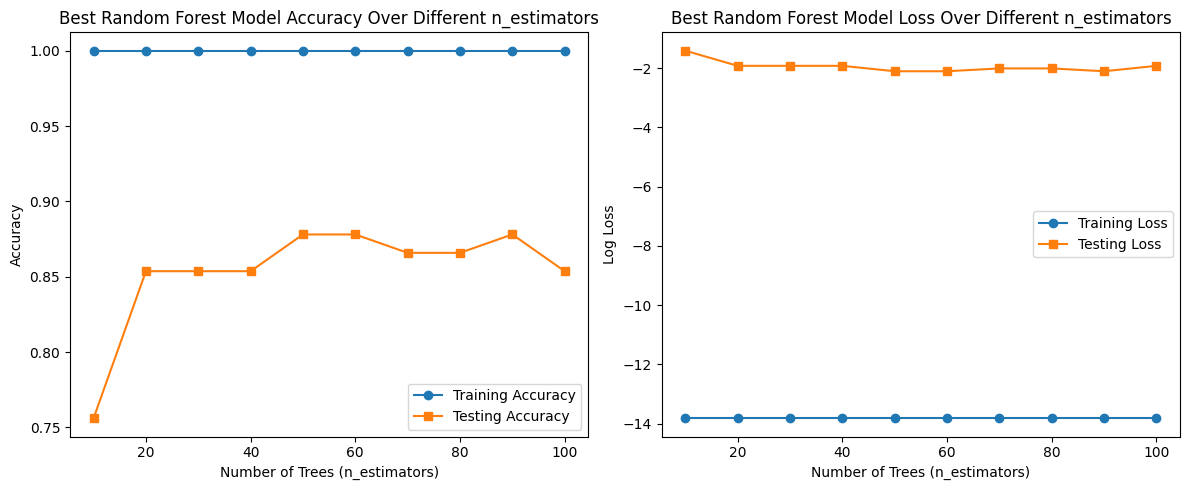

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv('/content/SSL.csv')  # Replace with actual path

# Preprocessing
X = data.drop(columns='LABEL')  # Assuming 'LABEL' is your label column
y = data['LABEL']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the best model based on highest F1-score
best_model_name = results_df['f1'].idxmax()
best_model_metrics = results[best_model_name]

# Define the best model
if best_model_name == 'Random Forest':
    best_model = RandomForestClassifier(n_estimators=100, random_state=42)
elif best_model_name == 'KNN':
    best_model = KNeighborsClassifier()
elif best_model_name == 'SVM':
    best_model = SVC(random_state=42)
elif best_model_name == 'Logistic Regression':
    best_model = LogisticRegression(random_state=42)

# Train the best model
best_model.fit(X_train, y_train)

# Function to check overfitting
def plot_overfitting_check(model, X_train, y_train, X_test, y_test, title):
    train_accuracies = []
    test_accuracies = []
    train_losses = []
    test_losses = []

    # Check overfitting at different stages of training (for RandomForest, changing n_estimators)
    for i in range(10, 110, 10):  # n_estimators from 10 to 100 for RandomForest
        temp_model = RandomForestClassifier(n_estimators=i, random_state=42) if best_model_name == 'Random Forest' else model
        temp_model.fit(X_train, y_train)

        # Calculate accuracy
        train_acc = accuracy_score(y_train, temp_model.predict(X_train))
        test_acc = accuracy_score(y_test, temp_model.predict(X_test))

        # Print the training and test accuracies for each stage
        print(f"n_estimators = {i if best_model_name == 'Random Forest' else 'N/A'}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}")

        # Append accuracy
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)

        # Avoid log(0) error for loss calculation
        train_loss = np.log(max(1e-6, 1 - train_acc))  # log(1 - accuracy), avoid log(0)
        test_loss = np.log(max(1e-6, 1 - test_acc))

        # Append loss
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(10, 110, 10), train_accuracies, label="Training Accuracy", marker="o")
    plt.plot(range(10, 110, 10), test_accuracies, label="Testing Accuracy", marker="s")
    plt.xlabel("Number of Trees (n_estimators)" if best_model_name == 'Random Forest' else "Model")
    plt.ylabel("Accuracy")
    plt.title(f"{title} Model Accuracy Over Different n_estimators")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(range(10, 110, 10), train_losses, label="Training Loss", marker="o")
    plt.plot(range(10, 110, 10), test_losses, label="Testing Loss", marker="s")
    plt.xlabel("Number of Trees (n_estimators)" if best_model_name == 'Random Forest' else "Model")
    plt.ylabel("Log Loss")
    plt.title(f"{title} Model Loss Over Different n_estimators")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Run overfitting check for the trained model
print("\nOverfitting Check for Best Model:")
plot_overfitting_check(best_model, X_train, y_train, X_test, y_test, f"Best {best_model_name}")


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Training Accuracy: 1.0000
Testing Accuracy: 0.8659


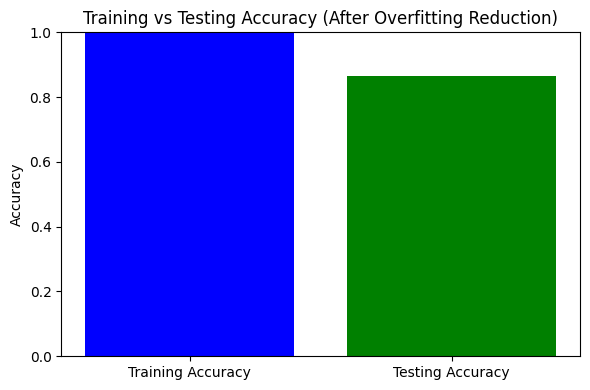

In [ ]:
# Function to adjust overfitting by tuning RandomForest hyperparameters
from sklearn.model_selection import GridSearchCV

def reduce_overfitting_rf(X_train, y_train, X_test, y_test):
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize RandomForest with baseline parameters
    rf = RandomForestClassifier(random_state=42)

    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding model
    best_rf_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")

    # Train the model
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model
    train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))

    # Print the results
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")

    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc], color=['blue', 'green'])
    plt.title('Training vs Testing Accuracy (After Overfitting Reduction)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

# Reduce overfitting for the RandomForest model
reduce_overfitting_rf(X_train, y_train, X_test, y_test)


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Training Accuracy: 1.0000
Testing Accuracy: 0.8659


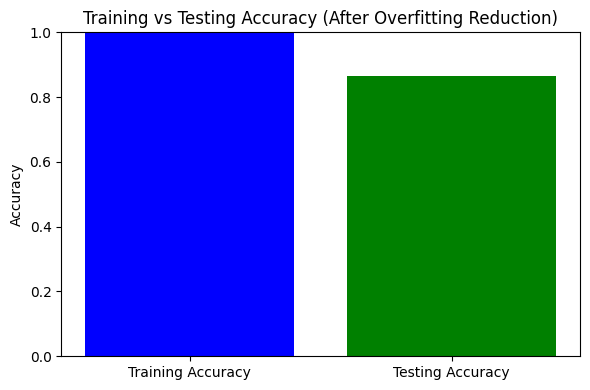

Best model saved as 'best_rf_model.pkl'
Extracted best model saved as 'extracted_best_model.pkl'


In [ ]:
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Function to adjust overfitting by tuning RandomForest hyperparameters
def reduce_overfitting_rf(X_train, y_train, X_test, y_test):
    # Define the parameter grid for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Initialize RandomForest with baseline parameters
    rf = RandomForestClassifier(random_state=42)

    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the corresponding model
    best_rf_model = grid_search.best_estimator_
    print(f"Best hyperparameters: {grid_search.best_params_}")

    # Train the model
    best_rf_model.fit(X_train, y_train)

    # Evaluate the model
    train_acc = accuracy_score(y_train, best_rf_model.predict(X_train))
    test_acc = accuracy_score(y_test, best_rf_model.predict(X_test))

    # Print the results
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")

    # Plot the results
    plt.figure(figsize=(6, 4))
    plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_acc, test_acc], color=['blue', 'green'])
    plt.title('Training vs Testing Accuracy (After Overfitting Reduction)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

    # Save the best model as 'best_rf_model.pkl'
    with open('best_rf_model.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)
        print("Best model saved as 'best_rf_model.pkl'")

    # Save the extracted best model as 'extracted_best_model.pkl'
    with open('extracted_best_model.pkl', 'wb') as f:
        pickle.dump(best_rf_model, f)  # You can replace this with another model if needed
        print("Extracted best model saved as 'extracted_best_model.pkl'")

# Reduce overfitting for the RandomForest model and save both models
reduce_overfitting_rf(X_train, y_train, X_test, y_test)


In [ ]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the best model from the .pkl file
with open('best_rf_model.pkl', 'rb') as f:
    best_rf_model = pickle.load(f)
    print("Best model loaded successfully!")

# Load the new dataset (assuming it's in a CSV file)
dataset_path = '/content/SSL.csv'  # Update with your dataset file path
new_data = pd.read_csv(dataset_path)

# Preprocess the new data (you may need to adapt this based on your data structure)
# For demonstration purposes, assuming that the new dataset has the same features as the training data
X_new = new_data.drop('LABEL', axis=1)  # Replace 'target' with your actual target column name
y_new = new_data['LABEL']  # Replace 'target' with your actual target column name

# Split into training and testing (if not already done in the CSV)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Predict using the loaded model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
test_acc = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {test_acc:.4f}")

# Print classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optionally, save the predictions to a new CSV
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('predictions_output.csv', index=False)
print("\nPredictions saved to 'predictions_output.csv'")


Best model loaded successfully!
Testing Accuracy: 0.8659

Classification Report:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89         4
           2       0.78      1.00      0.88         7
           3       1.00      0.80      0.89         5
           4       1.00      0.75      0.86         8
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         4
           7       1.00      0.86      0.92         7
           8       0.67      1.00      0.80         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         3
          11       0.75      1.00      0.86         3
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      0.40      0.57         5
          16       1.00      1.00      1.00         2


n_estimators = 10: Train Accuracy = 1.0000, Test Accuracy = 0.7561, Overfitting = 0.2439
n_estimators = 20: Train Accuracy = 1.0000, Test Accuracy = 0.8537, Overfitting = 0.1463
n_estimators = 30: Train Accuracy = 1.0000, Test Accuracy = 0.8537, Overfitting = 0.1463
n_estimators = 40: Train Accuracy = 1.0000, Test Accuracy = 0.8537, Overfitting = 0.1463
n_estimators = 50: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
n_estimators = 60: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
n_estimators = 70: Train Accuracy = 1.0000, Test Accuracy = 0.8659, Overfitting = 0.1341
n_estimators = 80: Train Accuracy = 1.0000, Test Accuracy = 0.8659, Overfitting = 0.1341
n_estimators = 90: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
n_estimators = 100: Train Accuracy = 1.0000, Test Accuracy = 0.8537, Overfitting = 0.1463
Best n_estimators: 50 (Least Overfitting)


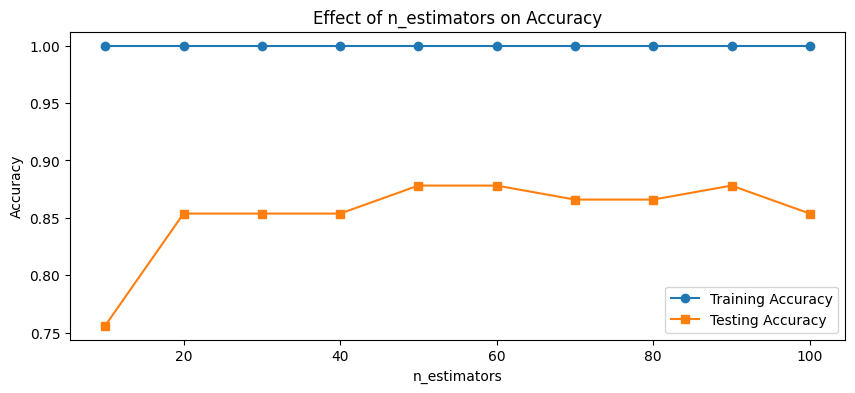

max_depth = 2: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
max_depth = 4: Train Accuracy = 0.9138, Test Accuracy = 0.7927, Overfitting = 0.1212
max_depth = 6: Train Accuracy = 0.9877, Test Accuracy = 0.8171, Overfitting = 0.1706
max_depth = 8: Train Accuracy = 1.0000, Test Accuracy = 0.8537, Overfitting = 0.1463
max_depth = 10: Train Accuracy = 1.0000, Test Accuracy = 0.8659, Overfitting = 0.1341
max_depth = 12: Train Accuracy = 1.0000, Test Accuracy = 0.8659, Overfitting = 0.1341
max_depth = 14: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
max_depth = 16: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
max_depth = 18: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
max_depth = 20: Train Accuracy = 1.0000, Test Accuracy = 0.8780, Overfitting = 0.1220
Best max_depth: 2 (Least Overfitting)


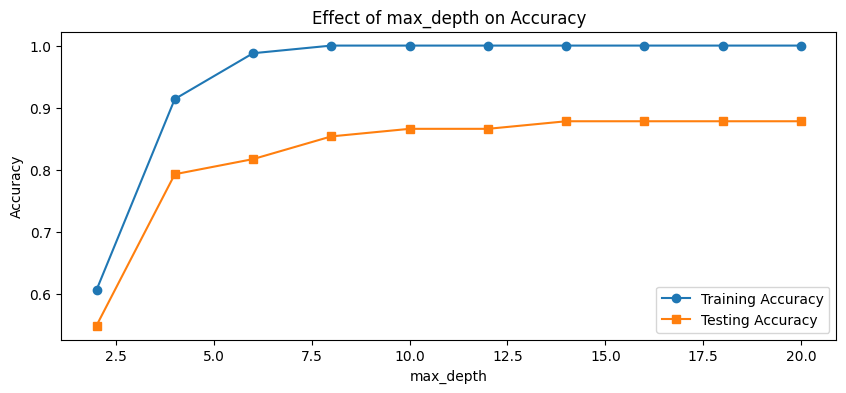

min_samples_split = 2: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 4: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 6: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 8: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 10: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 12: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 14: Train Accuracy = 0.6062, Test Accuracy = 0.5488, Overfitting = 0.0574
min_samples_split = 16: Train Accuracy = 0.6062, Test Accuracy = 0.5366, Overfitting = 0.0696
min_samples_split = 18: Train Accuracy = 0.6185, Test Accuracy = 0.5366, Overfitting = 0.0819
min_samples_split = 20: Train Accuracy = 0.6185, Test Accuracy = 0.5366, Overfitting = 0.0819
Best min_samples_split: 2 (Least Overfitting)


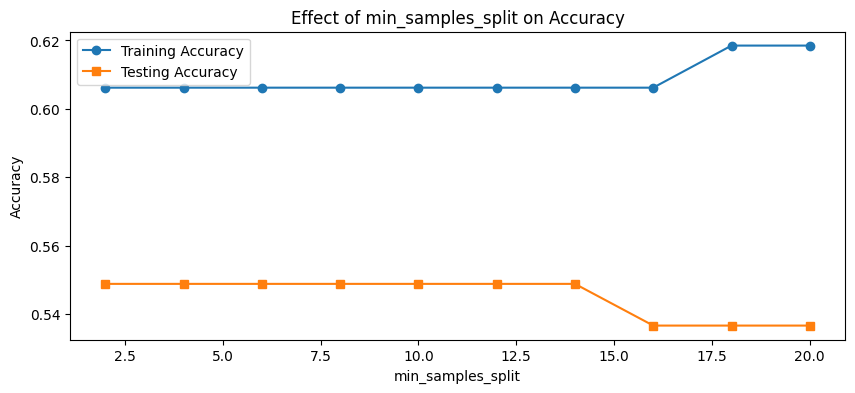

Final Best Parameters: n_estimators=50, max_depth=2, min_samples_split=2
Final Training Accuracy: 0.6062
Final Testing Accuracy: 0.5488


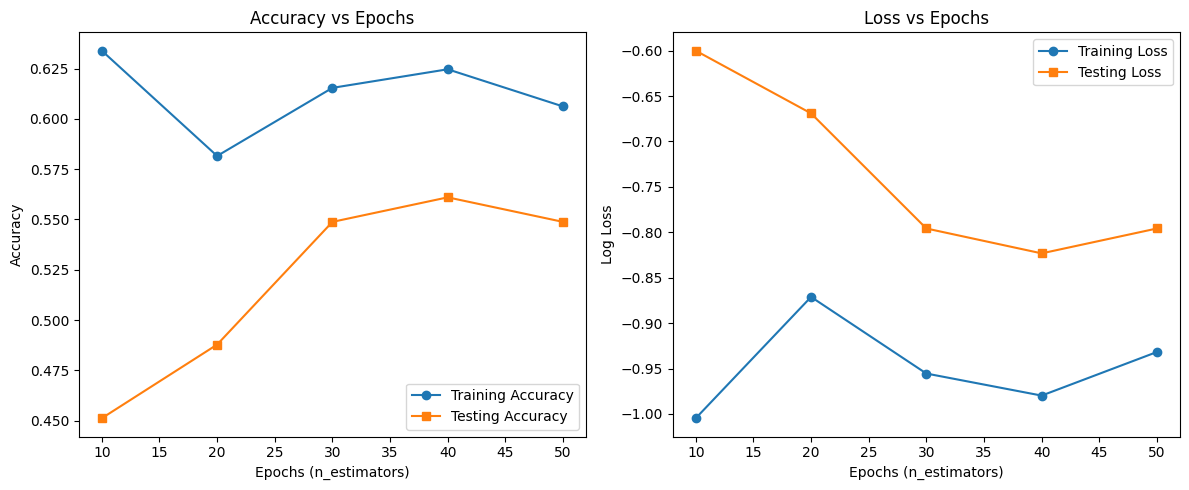

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv('/content/SSL.csv')  # Replace with actual path

# Preprocessing
X = data.drop(columns='LABEL')  # Assuming 'LABEL' is your label column
y = data['LABEL']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate overfitting with different hyperparameters
def evaluate_overfitting(param_name, param_values, fixed_params):
    train_accuracies = []
    test_accuracies = []
    overfitting_scores = []

    for value in param_values:
        params = fixed_params.copy()
        params[param_name] = value
        model = RandomForestClassifier(**params)
        model.fit(X_train, y_train)

        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))

        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        overfitting_scores.append(abs(train_acc - test_acc))

        print(f"{param_name} = {value}: Train Accuracy = {train_acc:.4f}, Test Accuracy = {test_acc:.4f}, Overfitting = {abs(train_acc - test_acc):.4f}")

    best_value = param_values[np.argmin(overfitting_scores)]
    print(f"Best {param_name}: {best_value} (Least Overfitting)")

    # Plot accuracy
    plt.figure(figsize=(10, 4))
    plt.plot(param_values, train_accuracies, label="Training Accuracy", marker="o")
    plt.plot(param_values, test_accuracies, label="Testing Accuracy", marker="s")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.title(f"Effect of {param_name} on Accuracy")
    plt.legend()
    plt.show()

    return best_value

# Default parameters
default_params = {'random_state': 42}

# Evaluate for n_estimators
best_n_estimators = evaluate_overfitting("n_estimators", range(10, 110, 10), default_params)

# Evaluate for max_depth
default_params["n_estimators"] = best_n_estimators
best_max_depth = evaluate_overfitting("max_depth", range(2, 21, 2), default_params)

# Evaluate for min_samples_split
default_params["max_depth"] = best_max_depth
best_min_samples_split = evaluate_overfitting("min_samples_split", range(2, 21, 2), default_params)

# Print the final best parameters
print(f"Final Best Parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth}, min_samples_split={best_min_samples_split}")

# Train the final model with best parameters
best_model = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
best_model.fit(X_train, y_train)

# Calculate final training and testing accuracy
final_train_acc = accuracy_score(y_train, best_model.predict(X_train))
final_test_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Testing Accuracy: {final_test_acc:.4f}")

# Plot accuracy/loss vs epochs (n_estimators)
n_estimators_range = range(10, best_n_estimators + 10, 10)
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    train_losses.append(np.log(max(1e-6, 1 - train_acc)))
    test_losses.append(np.log(max(1e-6, 1 - test_acc)))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_accuracies, label="Training Accuracy", marker="o")
plt.plot(n_estimators_range, test_accuracies, label="Testing Accuracy", marker="s")
plt.xlabel("Epochs (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, train_losses, label="Training Loss", marker="o")
plt.plot(n_estimators_range, test_losses, label="Testing Loss", marker="s")
plt.xlabel("Epochs (n_estimators)")
plt.ylabel("Log Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.tight_layout()
plt.show()
